In [50]:
import wandb
import matplotlib.pyplot as plt
import numpy as np
import collections
# from tqdm import tqdm

# policy_id = [150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850]
policy_id = [600, 650, 700, 750, 800, 850]
api = wandb.Api()

In [51]:
sweep = api.sweep("daniel-xiao/02_mc/eqy7fch5")
runs = sweep.runs
mc_data = {}

for run in runs:
    policy = run.config["policy_id"]
    # print(run.history(samples=10000)["estimate"])
    # break
    mc_estimates = run.history(samples=10000)["estimate"][:]
    if policy not in mc_data.keys():
        mc_data[policy] = [0] * 10000
    for idx, est in enumerate(mc_estimates):
        mc_data[policy][idx] += est / 20

In [52]:
sweep = api.sweep("daniel-xiao/03_bps/ab7ztevi")
runs = sweep.runs
bps_data = {}

for run in runs:
    policy = run.config["policy_id"]
    bps_estimates = run.history(samples=1000)["estimate"][:1000]
    if policy not in bps_data.keys():
        bps_data[policy] = [0] * 1000
    for idx, est in enumerate(bps_estimates):
        bps_data[policy][idx] += est / 20

In [53]:
sweep = api.sweep("daniel-xiao/03_robust_mod/qzd1m5k3")
runs = sweep.runs
robust_data = {}

for run in runs:
    policy = run.config["policy_id"]
    robust_estimates = run.history(samples=5000)["estimate"][:1000]
    if policy not in robust_data.keys():
        robust_data[policy] = [0] * 1000
    for idx, est in enumerate(robust_estimates):
        robust_data[policy][idx] += est / 20

In [45]:
sweep = api.sweep("daniel-xiao/03_robust/mnt75q6j")
runs = sweep.runs
robust_data = {}

for run in runs:
    policy = run.config["policy_id"]
    robust_estimates = run.history(samples=1000)["estimate"]
    robust_estimates = robust_estimates.to_list()
    robust_estimates = robust_estimates[:1000]
    if policy not in robust_data.keys():
        robust_data[policy] = [0] * 1000
    for idx, est in enumerate(robust_estimates):
        robust_data[policy][idx] += est / 20

In [54]:
mc_errors = [0] * 1000

for i in range(len(mc_errors)):
    for policy in policy_id:
        mc_errors[i] += 1/len(policy_id) * abs(mc_data[policy][i] - mc_data[policy][-1])


In [55]:
bps_errors = [0] * 1000

for i in range(len(bps_errors)):
    for policy in policy_id:
        bps_errors[i] += 1/len(policy_id) * abs(bps_data[policy][i] - mc_data[policy][-1])


In [56]:
robust_errors = [0] * 1000

for i in range(len(robust_errors)):
    for policy in policy_id:
        robust_errors[i] += 1/len(policy_id) * abs(robust_data[policy][i] - mc_data[policy][-1])


In [23]:
robust_errors

[0.11433866666666648,
 0.1394147181104565,
 0.11997563572847729,
 0.12549199999999974,
 0.13914507210449129,
 0.13458222222222202,
 0.13569333333333325,
 0.14024130751649427,
 0.13421185185185175,
 0.1309958073955836,
 0.12902774656083693,
 0.13124888888888875,
 0.1312628223124849,
 0.13064433918961246,
 0.12487729176658666,
 0.1309028699462259,
 0.12489225076824693,
 0.1256933333333334,
 0.12446526315789448,
 0.12635999999999978,
 0.12616952380952387,
 0.13156696197607115,
 0.12559567977915806,
 0.12405923031379522,
 0.12609333333333306,
 0.12647401916740245,
 0.1268044444444444,
 0.12426476190476196,
 0.12442896551724111,
 0.12635999999999992,
 0.128381505376344,
 0.13550602295211703,
 0.12888299339219675,
 0.1276541176470589,
 0.12807428571428559,
 0.12921185185185194,
 0.12812576576576562,
 0.12842479120482614,
 0.12783008547008556,
 0.1275266666666666,
 0.1278884552845525,
 0.1290266666666668,
 0.1285687064951657,
 0.12907172558754773,
 0.13048690837586438,
 0.1301860869565217,
 0

In [12]:
robust_estimates

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.8181818181818182,
 0.8333333333333334,
 0.8461538461538461,
 0.8571428571428571,
 0.8079274304870834,
 0.875,
 0.8823529411764706,
 0.8888888888888888,
 0.8947368421052632,
 0.8,
 0.7142857142857143,
 0.7272727272727273,
 0.7391304347826086,
 0.75,
 0.76,
 0.7692307692307693,
 0.7777777777777778,
 0.7857142857142857,
 0.7931034482758621,
 0.8,
 0.8086162398252932,
 0.8125,
 0.8181818181818182,
 0.8235294117647058,
 0.8285714285714286,
 0.8333333333333335,
 0.837837837837838,
 0.8421052631578949,
 0.808284023668639,
 0.8500000000000002,
 0.8536585365853661,
 0.8095238095238096,
 0.8139534883720931,
 0.8181818181818183,
 0.8222222222222224,
 0.8260869565217392,
 0.8297872340425534,
 0.8333333333333335,
 0.8367346938775512,
 0.8400000000000002,
 0.8431372549019609,
 0.8461538461538463,
 0.849056603773585,
 0.851851851851852,
 0.8545454545454547,
 0.8571428571428573,
 0.8596491228070177,
 0.8275862068965518,
 0.8305084745762713

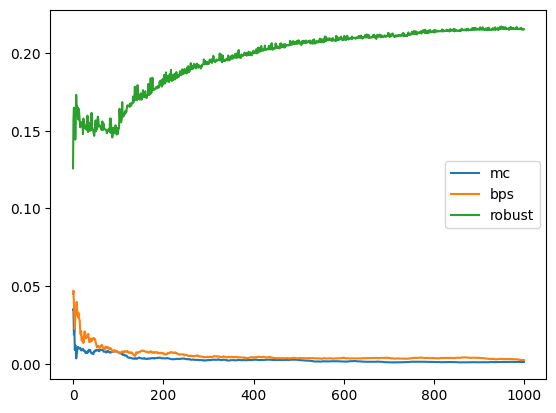

In [57]:
plt.plot([x for x in range(1000)], mc_errors, label="mc")
plt.plot([x for x in range(1000)], bps_errors, label="bps")
plt.plot([x for x in range(1000)], robust_errors, label="robust")
plt.legend()
plt.show()